In [ ]:
import pandas as pd

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [5]:
from data_processing import returns

In [6]:
returns

,Date,AGG,BIL,BND,EDV,IEF,IEI,SGOV,SHV,SHY,...,VOO,VTI,VTV,VUG,VWO,VXUS,XLE,XLF,XLG,XLK
0,2014-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-09,0.001547,-0.000219,0.000364,0.006597,0.003698,0.001965,NaN,0.000000,0.000355,...,-0.000792,0.000565,-0.002589,0.001816,-0.011263,-0.005607,0.010905,-0.002406,-0.001674,-0.000240
2,2014-12-10,0.001726,0.000000,0.002667,0.010867,0.004535,0.003023,NaN,0.000000,0.000828,...,-0.015685,-0.016376,-0.016521,-0.015649,-0.014364,-0.013492,-0.030821,-0.012862,-0.015024,-0.015115
3,2014-12-11,-0.000363,0.000000,-0.000967,0.004760,-0.001693,-0.001874,NaN,0.000091,-0.000473,...,0.004668,0.004593,0.005160,0.003974,-0.009296,-0.002450,-0.000663,0.002443,0.002838,0.004385
4,2014-12-12,0.003176,0.000219,0.003389,0.020990,0.008197,0.004162,NaN,0.000000,0.000946,...,-0.016235,-0.015716,-0.016832,-0.013035,-0.014963,-0.018212,-0.018563,-0.019496,-0.015352,-0.014795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,2024-11-25,0.008997,0.000109,0.009230,0.037277,0.010791,0.005864,0.000099,0.000181,0.001951,...,0.003215,0.004890,0.006275,0.001658,0.000440,0.003284,-0.019739,0.006505,0.000407,-0.000043
2509,2024-11-26,-0.001520,0.000000,-0.001775,-0.004340,-0.002114,-0.000686,0.000199,0.000091,0.000000,...,0.005608,0.003658,0.000717,0.008352,-0.005283,-0.005073,-0.001363,0.001958,0.009565,0.005009
2510,2024-11-27,0.002740,0.000327,0.002735,0.009398,0.004025,0.002574,0.000199,0.000181,0.000609,...,-0.003187,-0.002842,-0.000441,-0.005783,0.003762,0.004441,-0.001050,0.001955,-0.005039,-0.013546
2511,2024-11-29,0.003947,0.000218,0.003682,0.013493,0.004220,0.002310,0.000397,0.000453,0.001216,...,0.005268,0.005567,0.003365,0.008405,0.004630,0.010480,0.004310,0.001561,0.008306,0.009284


In [7]:
# change to long format to prepare for prophet modeling
long_format = returns.melt(id_vars=['Date'],
                           var_name = 'Stock',
                           value_name = 'Return')


In [8]:
long_format

,Date,Stock,Return
0,2014-12-08,AGG,NaN
1,2014-12-09,AGG,0.001547
2,2014-12-10,AGG,0.001726
3,2014-12-11,AGG,-0.000363
4,2014-12-12,AGG,0.003176
...,...,...,...
118106,2024-11-25,XLK,-0.000043
118107,2024-11-26,XLK,0.005009
118108,2024-11-27,XLK,-0.013546
118109,2024-11-29,XLK,0.009284


In [9]:
# rename to match compatibility with prophet 
long_format.rename(columns= {'Date':'ds','Return':'y'},inplace=True)

In [10]:
long_format

,ds,Stock,y
0,2014-12-08,AGG,NaN
1,2014-12-09,AGG,0.001547
2,2014-12-10,AGG,0.001726
3,2014-12-11,AGG,-0.000363
4,2014-12-12,AGG,0.003176
...,...,...,...
118106,2024-11-25,XLK,-0.000043
118107,2024-11-26,XLK,0.005009
118108,2024-11-27,XLK,-0.013546
118109,2024-11-29,XLK,0.009284


In [11]:
# place each stock in groups
stock_groups = {stock:group[['ds','y']] for stock, group in long_format.groupby('Stock')}

In [12]:
stock_groups['AGG']

,ds,y
0,2014-12-08,NaN
1,2014-12-09,0.001547
2,2014-12-10,0.001726
3,2014-12-11,-0.000363
4,2014-12-12,0.003176
...,...,...
2508,2024-11-25,0.008997
2509,2024-11-26,-0.001520
2510,2024-11-27,0.002740
2511,2024-11-29,0.003947


In [1]:
from prophet import Prophet

In [13]:
# dictionaries to store prophet stock predictions 
prophet_datasets = {}
forecasts = {}

In [15]:
# loop through stocks to get future predictions on each stock
for stock, data in stock_groups.items():
    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=365)
    forecast=model.predict(future)
    
    prophet_datasets[stock]=model
    forecasts[stock]=forecast
    

09:12:58 - cmdstanpy - INFO - Chain [1] start processing
09:12:58 - cmdstanpy - INFO - Chain [1] done processing
09:12:59 - cmdstanpy - INFO - Chain [1] start processing
09:12:59 - cmdstanpy - INFO - Chain [1] done processing
09:12:59 - cmdstanpy - INFO - Chain [1] start processing
09:13:00 - cmdstanpy - INFO - Chain [1] done processing
09:13:00 - cmdstanpy - INFO - Chain [1] start processing
09:13:00 - cmdstanpy - INFO - Chain [1] done processing
09:13:01 - cmdstanpy - INFO - Chain [1] start processing
09:13:01 - cmdstanpy - INFO - Chain [1] done processing
09:13:01 - cmdstanpy - INFO - Chain [1] start processing
09:13:01 - cmdstanpy - INFO - Chain [1] done processing
09:13:02 - cmdstanpy - INFO - Chain [1] start processing
09:13:02 - cmdstanpy - INFO - Chain [1] done processing
09:13:02 - cmdstanpy - INFO - Chain [1] start processing
09:13:02 - cmdstanpy - INFO - Chain [1] done processing
09:13:03 - cmdstanpy - INFO - Chain [1] start processing
09:13:03 - cmdstanpy - INFO - Chain [1]

In [21]:
AGG_predictions = forecasts['AGG']
AGG_predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2873,2025-11-28,0.000443,-0.003347,0.004959,0.000426,0.000463,0.000485,0.000485,0.000485,-0.000122,-0.000122,-0.000122,0.000607,0.000607,0.000607,0.0,0.0,0.0,0.000928
2874,2025-11-29,0.000443,-0.002612,0.005841,0.000426,0.000463,0.001246,0.001246,0.001246,0.000641,0.000641,0.000641,0.000606,0.000606,0.000606,0.0,0.0,0.0,0.001690
2875,2025-11-30,0.000444,-0.002408,0.005815,0.000427,0.000464,0.001239,0.001239,0.001239,0.000641,0.000641,0.000641,0.000598,0.000598,0.000598,0.0,0.0,0.0,0.001683
2876,2025-12-01,0.000444,-0.003959,0.004527,0.000427,0.000464,-0.000162,-0.000162,-0.000162,-0.000748,-0.000748,-0.000748,0.000586,0.000586,0.000586,0.0,0.0,0.0,0.000282
2877,2025-12-02,0.000444,-0.003578,0.005393,0.000427,0.000465,0.000349,0.000349,0.000349,-0.000219,-0.000219,-0.000219,0.000568,0.000568,0.000568,0.0,0.0,0.0,0.000793


In [26]:
VOO_predictions = forecasts['VOO']
VOO_predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2873,2025-11-28,0.000627,-0.011958,0.014593,0.000627,0.000627,0.000422,0.000422,0.000422,0.000155,0.000155,0.000155,0.000268,0.000268,0.000268,0.0,0.0,0.0,0.001049
2874,2025-11-29,0.000627,-0.013252,0.014374,0.000627,0.000627,-0.000301,-0.000301,-0.000301,-0.000433,-0.000433,-0.000433,0.000132,0.000132,0.000132,0.0,0.0,0.0,0.000326
2875,2025-11-30,0.000627,-0.014237,0.013847,0.000627,0.000627,-0.000435,-0.000435,-0.000435,-0.000433,-0.000433,-0.000433,-0.000002,-0.000002,-0.000002,0.0,0.0,0.0,0.000192
2876,2025-12-01,0.000627,-0.013588,0.014109,0.000627,0.000627,-0.000044,-0.000044,-0.000044,0.000089,0.000089,0.000089,-0.000133,-0.000133,-0.000133,0.0,0.0,0.0,0.000583
2877,2025-12-02,0.000627,-0.013627,0.014538,0.000627,0.000627,-0.000030,-0.000030,-0.000030,0.000230,0.000230,0.000230,-0.000260,-0.000260,-0.000260,0.0,0.0,0.0,0.000598


In [32]:
import matplotlib.pyplot as plt

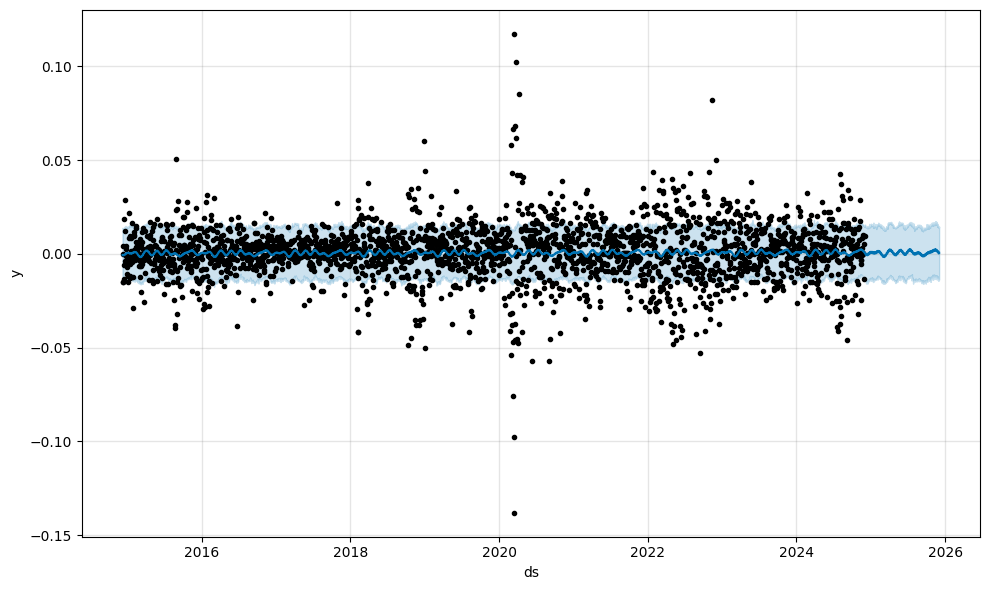

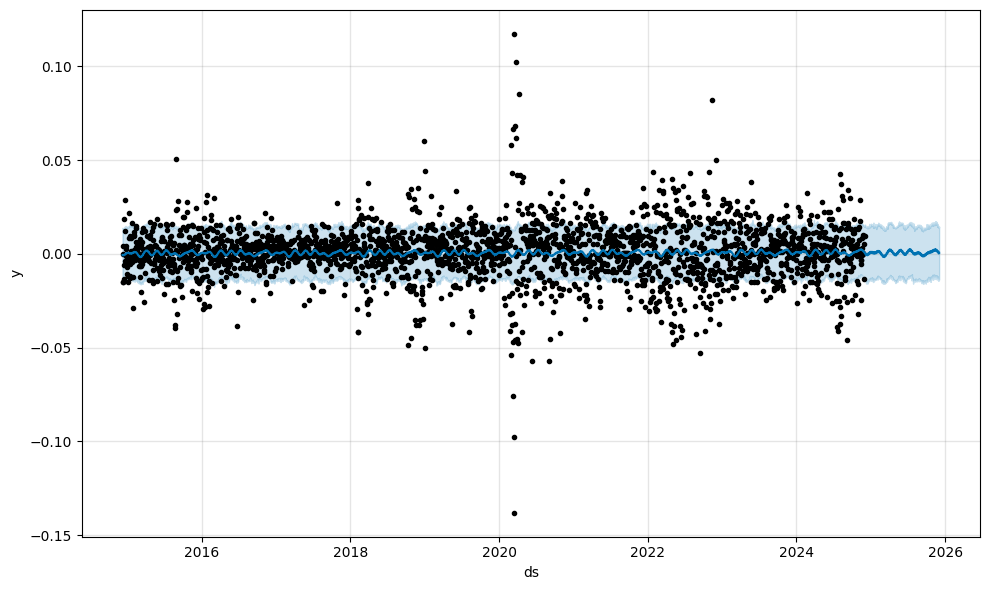

In [35]:
model.plot(VOO_predictions)

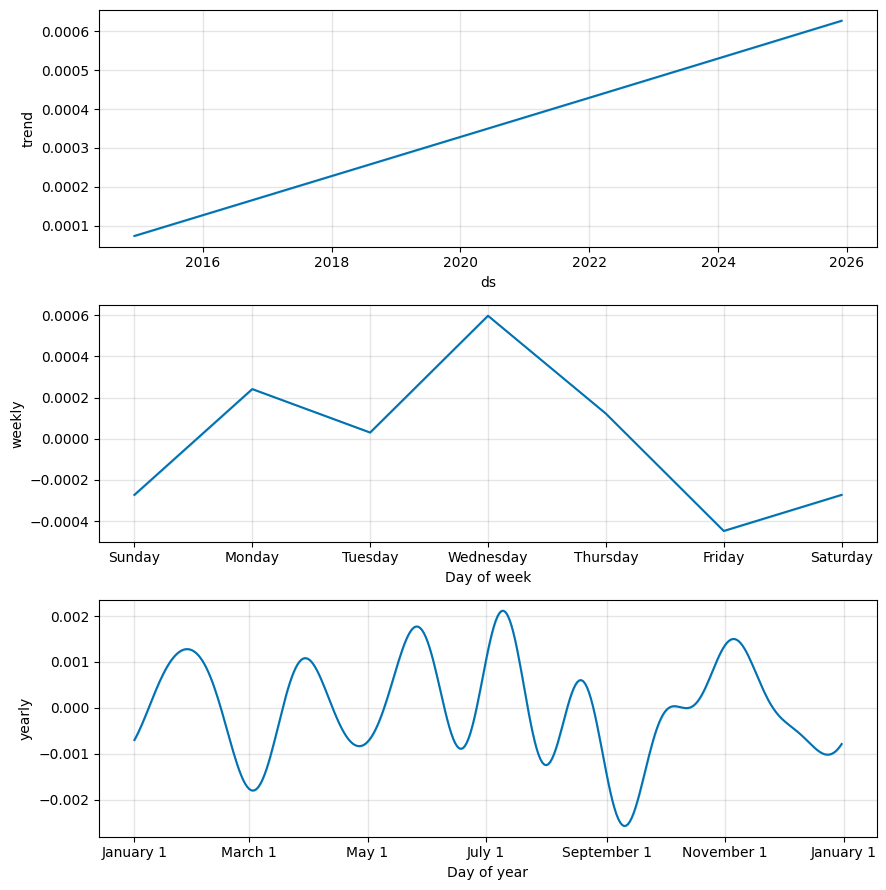

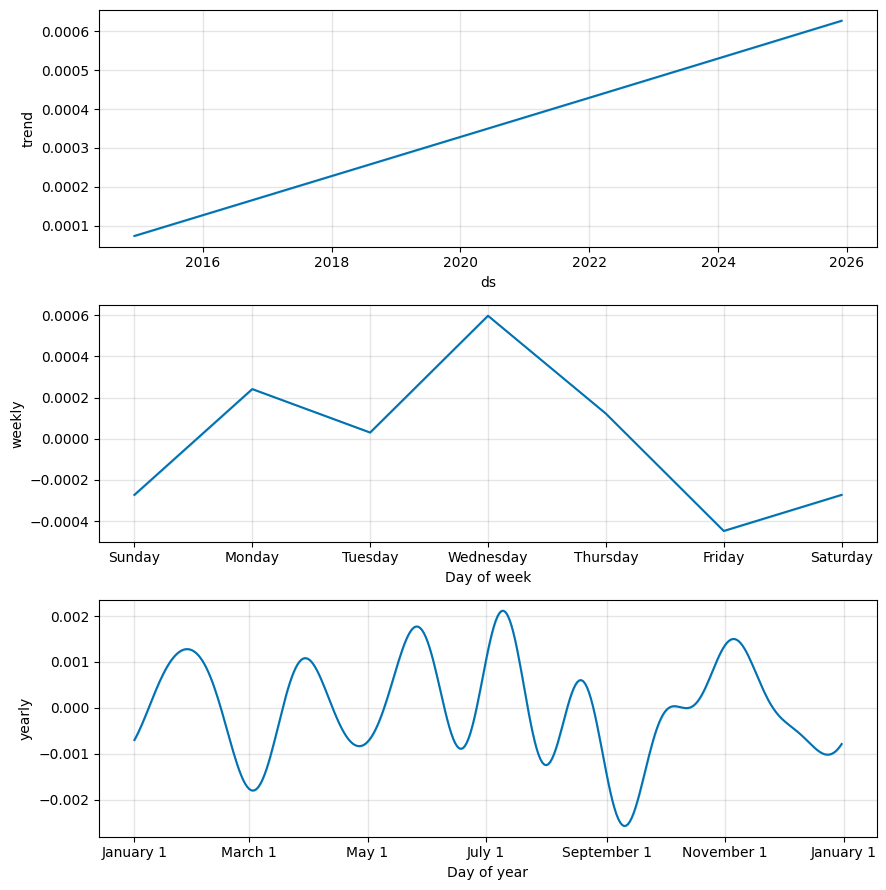

In [36]:
model.plot_components(VOO_predictions)